# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
%matplotlib inline  


df = pd.read_csv('human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

There are several ways to test for normality. We will explore a few graphical representations of data to assess the normality of the temperature data and then move on to statistical analyses using z-scores and normality test.

In [2]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    n = len(data) # Number of data points: n
    x = np.sort(data) # x-data for the ECDF: x    
    y = np.arange(1, n+1) / n # y-data for the ECDF: y

    return x, y

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


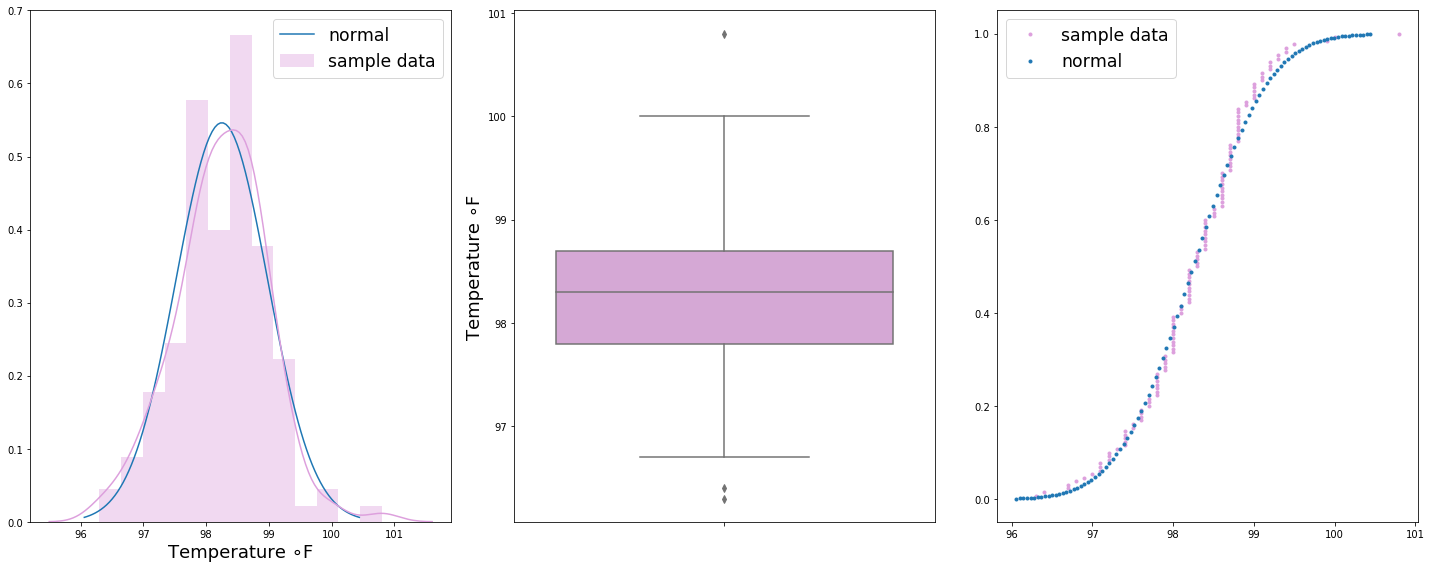

In [4]:
sample_temps=np.array(df.temperature)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

mean = np.mean(sample_temps)
std = np.std(sample_temps)
x = np.linspace(mean - 3*std, mean + 3*std, 100)

ax1.plot(x, mlab.normpdf(x, mean, std), label='normal')
sns.distplot(df.temperature, ax=ax1, label='sample data', color='plum')
ax1.legend(loc='upper right', fontsize='xx-large')
ax1.set_xlabel('Temperature ∘F', fontsize=18)

ax2=sns.boxplot(y='temperature', data=df, ax=ax2, color='plum')
ax2.set_ylabel('Temperature ∘F', fontsize=18)

temp_x,temp_y=ecdf(df['temperature'])
normal_cdf = stats.norm.cdf(x, mean, std)
ax3.plot(temp_x, temp_y, marker='.', linestyle='none',color='plum', label='sample data')
ax3.plot(x, normal_cdf, marker='.', linestyle='none', label='normal')
ax3.legend(loc='upper left', fontsize='xx-large')

plt.tight_layout()

Based on the plot above, the data visually seems to be close to normal. Further statistical analysis will help verify whether the data is truly normally distributed.

In [5]:
def calculate_z(value, mean, std):
    z_score= (value-mean) / std
    return z_score

z_max= calculate_z(np.max(sample_temps), np.mean(sample_temps), np.std(sample_temps))
z_min= calculate_z(np.min(sample_temps), np.mean(sample_temps), np.std(sample_temps))

print('Z-score for maximum value is ', z_max, ' Z-score for minimum value is ', z_min)

Z-score for maximum value is  3.4924927267748074  Z-score for minimum value is  -2.6688711006173778


According to the normal empirical rule, almost all values of the data (~99%) should lie witihin three standard deviations of the mean. We used the z-score for the maximum and mininum temperature values in the given dataset to check how many standard deviations away from the mean they were. The values are quite close to the normal values. The consequent normal test would help establish normality of the data.

In [6]:
statistic, p=stats.normaltest(df.temperature)
print('The statistic = ',statistic, ' And the p-value = ', p)

The statistic =  2.703801433319203  And the p-value =  0.2587479863488254


In [7]:
alpha = 0.05  # setting value of alpha

print('Null Hypothesis : The data is normally distributed \n')
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Verdict: The null hypothesis can be rejected")
else:
    print("Verdict: The null hypothesis cannot be rejected")

Null Hypothesis : The data is normally distributed 

Verdict: The null hypothesis cannot be rejected


All the analyses above give us enough evidence that the temperature data provided seems to be normally distributed and we didn't find enough evidence to classify the data as not normal. So, moving ahead, we can assume the provided body temperature data to be normally distributed.

### 2. Is the sample size large? Are the observations independent?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


<li>For the data to be considered large, the sample size needs to be > 30. In this case, we have 130 data points for temperature values i.e. n > 30 and thus we can conclude that the sample size is large enough. <br>
<li>Next, for the observations to be independent, the observations either need to be performed with replacement or the sample size has to be less than 10% of the total population. Since there are 130 observations, that is obviously <10% of the total human population. So, we can also assume the observations to be independent of each other.

### 3. Is the true population mean really 98.6 degrees F?
 <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

##### The first approach is to run bootstrap hypothesis test.
<br>
  <li> Null Hypothesis : The true population mean =98.6 F
  <li> Alternate Hypothesis: The true population mean is !=98.6 F
<br><br>
We run the analysis assuming the null to be true and then calculate the p-value to make a decision on whether our null hypothesis is true. 

In [9]:
new_temps=sample_temps-np.mean(sample_temps)+98.6

In [10]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty(size)    # Initialize array of replicates: bs_replicates
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [11]:
def difference_from_original(data, original=98.6):
    return (np.mean(data)-original)

diff_observed=difference_from_original(sample_temps)

In [12]:
bs_reps = draw_bs_reps(new_temps, difference_from_original, 100000)
p_val=np.sum(bs_reps<=diff_observed) /len(bs_reps)

print('Null Hypothesis : The true population mean is 98.6 F \np-value = ', p_val)
if p_val < alpha:  
    print("Verdict: The null hypothesis can be rejected based on bootstrapping analysis")
else:
    print("Verdict: The null hypothesis cannot be rejected based on bootstrapping analysis")

Null Hypothesis : The true population mean is 98.6 F 
p-value =  0.0
Verdict: The null hypothesis can be rejected based on bootstrapping analysis


##### Next we will perform frequentist statistical testing using the t - statistic
<br>
We will perfrom a one-sampled t test in this case because we have one sample dataset which we want to compare against the given statistic (true population mean in this case). This will be a two-tailed test since we are checking for both- if the mean is either > or < given population mean. Since we are checking on both sides of the mean, it is considered a two-tailed test. <br>
Additionally, we use the t-statistic here becase we don't know the population standard deviation, we only know the sample standard deviation.

In [13]:
sample_mean= np.mean(sample_temps)
sample_std= np.std(sample_temps)
sample_size= df.temperature.count()
hypothesis_value=98.6

In [14]:
def t_score_p_value(mean,std,n,value):
    t=(mean-value)/(std/(n**0.5))
    pval = stats.t.sf(np.abs(t), n-1)*2
    return t,pval

In [15]:
t_value,p_value=t_score_p_value(sample_mean, sample_std, sample_size, hypothesis_value)

print('Null Hypothesis : The true population mean is 98.6 F \n p-value = ', p_value)
if p_value < alpha:  
    print("Verdict: The null hypothesis can be rejected based on one sample t-test")
else:
    print("Verdict: The null hypothesis cannot be rejected based on one sample t-test")

Null Hypothesis : The true population mean is 98.6 F 
 p-value =  2.1887464624050777e-07
Verdict: The null hypothesis can be rejected based on one sample t-test


#### In both of the hypothesis tests we had enough evidence to reject the null hypothesis, which stated that the true population mean is 98.6F. So, we have enough evidence that suggests the true population mean is nor 98.6 degree F.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

First drawing a sample of 10 from the given dataset and performing bootstrap hypothesis as done above and then the frequentist hypothesis testing. The only difference here is the samples size (n=10).

In [16]:
draw_10=df['temperature'].sample(10).values
draw_10_shifted=draw_10-np.mean(draw_10)+98.6
draw_10_diff=difference_from_original(draw_10)
draw_10_bs_reps = draw_bs_reps(draw_10_shifted, difference_from_original, 100000)
p_val=np.sum(draw_10_bs_reps<=draw_10_diff) /len(draw_10_bs_reps)

print('Null Hypothesis : The true population mean is 98.6 F (in 10 samples) \n p-value = ', p_val)
if p_val < alpha:  
    print("Verdict: The null hypothesis can be rejected based on bootstrapping analysis in 10 samples")
else:
    print("Verdict: The null hypothesis cannot be rejected based on bootstrapping analysis in 10 samples")

Null Hypothesis : The true population mean is 98.6 F (in 10 samples) 
 p-value =  0.15596
Verdict: The null hypothesis cannot be rejected based on bootstrapping analysis in 10 samples


In [17]:
draw_10_mean= np.mean(draw_10)
draw_10_std= np.std(draw_10)
hypothesis_value=98.6

t_value,p_value=t_score_p_value(draw_10_mean, draw_10_std, 10, hypothesis_value)

print('Null Hypothesis : The true population mean is 98.6 F (in 10 samples) \n p-value = ', p_value)
if p_value < alpha:  
    print("Verdict: The null hypothesis can be rejected based on frequentist analysis in 10 samples")
else:
    print("Verdict: The null hypothesis cannot be rejected based on frequentist analysis in 10 samples")

Null Hypothesis : The true population mean is 98.6 F (in 10 samples) 
 p-value =  0.326541301933512
Verdict: The null hypothesis cannot be rejected based on frequentist analysis in 10 samples


#### In the analyses in #3, we got consistent results showing that the true population mean is not 98.6 F. When we did the same analyses using 10 random samples, we were able to reject the null only with the bootstrapping hypothesis testing and thus we can assume that using the bootstrapping analysis would be correct.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

To determine which body temperature is considered abnormal, we can look at outliers. We can set up a confidence interval of 95% and then all the values outside of it would be considered abnormal.

In [18]:
sample_CI=np.percentile(sample_temps, [2.5,97.5])
print('Only considering the data provided to us:\n \
The temperature would be considered abnormal if it is less than ', sample_CI[0], 'F or greater than ', sample_CI[1],' F.')


Only considering the data provided to us:
 The temperature would be considered abnormal if it is less than  96.7225 F or greater than  99.4775  F.


In [19]:
bs_reps_mean = draw_bs_reps(sample_temps, np.mean, 100000)

bs_CI=np.percentile(bs_reps_mean, [2.5,97.5])
print('Based on bootstrap replicates:\n \
The temperature would be considered abnormal if it is less than ', bs_CI[0], 'F or greater than ', bs_CI[1],' F.')


Based on bootstrap replicates:
 The temperature would be considered abnormal if it is less than  98.12307692307692 F or greater than  98.37384615384617  F.


### 6. Is there a significant difference between males and females in normal temperature?

To establish this, we would have to employ a 2-sampled t-test. Since in this case we are trying to compare two different samples (males vs females).

<li> Null Hypothesis : The mean temperature of males = mean temperature of females
  <li> Alternate Hypothesis: The mean temperature of males is not equal to mean temperature of females <br><br>
      We will calculate p-value assuming that the null is true.

In [20]:
males=df[df.gender=='M']['temperature'].values
females=df[df.gender=='F']['temperature'].values

t, p_value = ttest_ind(males, females)

print('Null Hypothesis : The mean temperature of males = mean temperature of females\n p-value = ', p_value)
if p_value < alpha:  
    print("Verdict: The null hypothesis can be rejected.")
else:
    print("Verdict: The null hypothesis cannot be rejected.")

Null Hypothesis : The mean temperature of males = mean temperature of females
 p-value =  0.02393188312239561
Verdict: The null hypothesis can be rejected.


The t-test tells us that there are differences between males and females in normal body temperatures.

## Conclusions:

<li> We found out that the true population mean of normal body temperature which was considered to be 98.6F is statistically incorrect. <br>
 <li> If we were to take random samples and calculate true population mean based on the samples, the mean would lie in the interval (96.7225, 9.4775) 95% of time.
 <li> The boostrapping analysis was found to be better for performing hypothesis testing when we had had a very small sample size.
 <li> Lastly, we also found that there are differences between the normal body temperatures for males and females.